In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

class Algorithm:
    GRECON = "GreCon"
    GRECON2 = "GreCon2"
    GRECOND = "GreConD"

class Folder:
    GRAPHS = "graphs"
    RESULTS = "results"
    DATA = "data"
    DATASETS = "datasets"
    GRECON_VS_GRECOND_SIMILARITY = "grecon_vs_grecond_similarity"
    ALL_ALGORITHMS_COVERAGE_GRAPH = "grecon_greConD_grecon2_coverage_graph"
    GRECON2_GRECOND_COVERAGE_GRAPH  = "grecon2_greConD_coverage_graph"

current_path = Path('.')
input_folder = current_path / Folder.RESULTS / Folder.GRECON2_GRECOND_COVERAGE_GRAPH
output_folder = current_path / Folder.GRAPHS / Folder.GRECON2_GRECOND_COVERAGE_GRAPH

print(list(map(lambda x: x.name, input_folder.rglob('*.csv'))))

for dataset_path in input_folder.rglob('*.csv'):
    df = pd.read_csv(str(dataset_path) , delimiter=";", index_col=0, header=None)

    rows = df.values
    scatters = []
    algorithms = df.index
        
    fig, lines = plt.subplots()
        
    markers = {
        Algorithm.GRECON  : ">",
        Algorithm.GRECOND : "x",
        Algorithm.GRECON2 : "+"
    }

    for algorithm in algorithms:
        max_value = max(df.loc[algorithm])
        y = list(map(lambda x: x / max_value, df.loc[algorithm][::20]))
        x = list(range(0, len(df.loc[algorithm]) - 1, 20))
    
        scatters.append(plt.scatter(x, y, marker=markers[algorithm], 
                                    color='black'))
        
        plt.plot(x, y, marker="", color='black', linewidth=0.5)
        

    plt.xlabel('Number of Factors')
    plt.ylabel('Coverage')
    plt.ylim(0, 1.1)
    plt.xlim(xmin=-0.5)

    #plt.tight_layout()
    plt.legend(scatters, algorithms,
                loc='lower right')


    dataset_name = dataset_path.name.replace(".csv", ".eps")
    output_path = output_folder / dataset_name
    plt.savefig(str(output_path), format='eps')
    plt.close()



['americas_large.csv']


ParserError: Error tokenizing data. C error: Expected 569 fields in line 2, saw 574


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/grecon_vs_grecond_similarity/americas_large.eps'

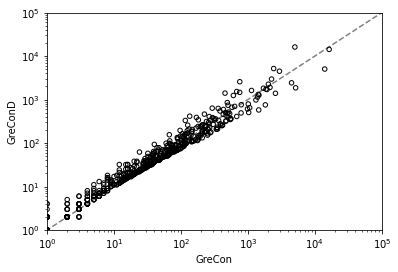

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

class Algorithm:
    GRECON = "GreCon"
    GRECON2 = "GreCon2"
    GRECOND = "GreConD"

class Folder:
    GRAPHS = "graphs"
    RESULTS = "results"
    DATA = "data"
    DATASETS = "datasets"
    GRECON_VS_GRECOND_SIMILARITY = "grecon_vs_grecond_similarity"
    ALL_ALGORITHMS_COVERAGE_GRAPH = "grecon_greConD_grecon2_coverage_graph"
    GRECON2_GRECOND_COVERAGE_GRAPH  = "grecon2_greConD_coverage_graph"

x = np.linspace(0, 100000, 100)
plt.plot(x, x, linestyle='dashed', color='gray', zorder=0)
    

current_path = Path('.')
input_folder = current_path / Folder.RESULTS / Folder.GRECON_VS_GRECOND_SIMILARITY
output_folder = current_path / Folder.GRAPHS / Folder.GRECON_VS_GRECOND_SIMILARITY

for dataset_path in input_folder.rglob('*.csv'):
    df = pd.read_csv(str(dataset_path) , delimiter=";", index_col=0, header=None)

    x = list(df.loc[Algorithm.GRECON][1:])
    y = list(df.loc[Algorithm.GRECOND][1:])
    
    axis_min = min(min(x), min(y))
    axis_max = max(max(x), max(y)) 
    
    plt.scatter(x, y, s=20, facecolors='none', edgecolors='black')

    plt.xlabel('GreCon')
    plt.ylabel('GreConD')
    plt.yscale("log")
    plt.xscale("log")
    plt.margins(0)

    dataset_name = dataset_path.name.replace(".csv", ".eps")
    output_path = output_folder / dataset_name
    plt.savefig(str(output_path), format='eps')